Nama Anda : Rachmat Risanto
Tahun Lahir Anda : 1976
======= Kategori Sakit ========
0 tidak ada
1 ringan
2 berat
masukkan angka : 2
======= Kategori Kehidupan ========
0 wafat
1 hidup
masukkan angka : 1

========== Keputusan =============
Nama Anda : Rachmat Risanto
Umur Anda : 42
Kategori Usia : 1 muda
Kategori Batas : 0 tidak
Kategori Sakit : 2 berat
Status Kehidupan : 1 hidup
Anda dinyatakan :  [1] pensiun dini 



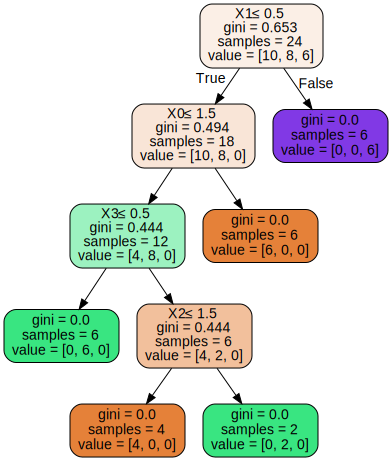

In [4]:
#Inputan Nama dan Tahun Lahir
nama = input("Nama Anda : " )
thlahir = input("Tahun Lahir Anda : ")
if thlahir >= "2018":
  thlahir = "2018"
else:
  thlahir = thlahir
umur = 2018 - int(thlahir)

#seleksi umur
def sel_umur(umur):
  if umur >= 50:
    usia = 0
  elif umur <= 18:
    usia = 2
  else:
    usia = 1
  return usia
usia = sel_umur(umur)

#seleksi batas
def sel_batas(umur):
  if umur >= 60:
    batas = 1
  else:
    batas = 0
  return batas
batas = sel_batas(umur)

selhidup = ["wafat","hidup"]
selyesno = ["tidak","ya"]
selsakit = ["tidak ada","ringan","berat"]
selusia = ["tua","muda","pelajar"]
pensiun = ["belum pensiun","pensiun dini","pensiun"]

#Inputan Kategori Sakit
print ("======= Kategori Sakit ========")
for i in range(0,len(selsakit)):
  print (i,selsakit[i])
insakit = input ("masukkan angka : ")
def sel_sakit(insakit):
  if insakit > "2":
    sakit = 2
  else:
    sakit = int(insakit)
  return sakit
sakit = sel_sakit(insakit)

#Inputan Kategori Kehidupan
print ("======= Kategori Kehidupan ========")
for i in range(0,len(selhidup)):
  print (i,selhidup[i])
inhidup = input("masukkan angka : ")
def sel_hidup(inhidup):
  if inhidup >= "1":
    hidup = 1
  else:
    hidup = 0
  return hidup
hidup = sel_hidup(inhidup)

#keperluan
!pip install -q graphviz && pip install -q pydot
import graphviz
import pandas as pd
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#persiapan Data
data = pd.read_csv('pensiun1.csv')
datanya = data.drop('keputusan', axis = 1) #Attribut data
target = data['keputusan'] #attribut keputusan pensiun

#Klarifikasi dengan SKLearn
klarifikasi = tree.DecisionTreeClassifier()
clf = klarifikasi.fit(datanya,target)
hasil = clf.predict([[usia,batas,sakit,hidup]])
print ("\n========== Keputusan =============")
print ("Nama Anda :", nama)
print ("Umur Anda :", umur)
print ("Kategori Usia :",usia,selusia[usia])
print ("Kategori Batas :",batas,selyesno[batas])
print ("Kategori Sakit :",sakit,selsakit[sakit])
print ("Status Kehidupan :",hidup,selhidup[hidup])
print("Anda dinyatakan : ",hasil,pensiun[int(hasil)],"\n")

#Mencetak Grafik
data_grafik = tree.export_graphviz(clf,out_file=None, 
                                   filled=True, rounded=True,  
                                   special_characters=True)
grafik = graphviz.Source(data_grafik)
grafik